In [20]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

from typing import Annotated
from langgraph.graph.message import add_messages

In [21]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [22]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [23]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = "gpt-4o-mini")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-Brm53mJyHX8iHDJoX6K8MIpeo5P3N', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2af9ea73-b9cd-4f2c-98a8-ea0a1eab3d84-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [24]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model = "qwen-qwq-32b")
llm_groq.invoke("Hey I need to play cricket")

AIMessage(content='\n<think>\nOkay, the user wants to play cricket. Let me think about how to help them. First, I need to figure out what exactly they need. Are they looking for tips on playing, information about the game, or maybe help organizing a match? Since they just said "Hey I need to play cricket," maybe they\'re looking to start a game but aren\'t sure how. \n\nI should start by understanding their situation better. Maybe they don\'t have enough players or equipment. Cricket can be played with just a bat, a ball, and some makeshift stumps. Let me mention that first. If they don\'t have a full team, they could play with fewer players, like in Kwik Cricket or backyard cricket. \n\nI should outline the basic steps to set up a game. Maybe suggest gathering friends, finding a flat area, setting up wickets, and explaining the rules briefly. It\'s important to mention the essential rules like batting, bowling, fielding positions, and scoring. Also, maybe common terms they might not k

In [25]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}


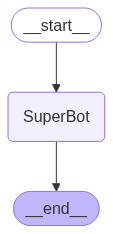

In [26]:
graph = StateGraph(State)
graph.add_node("SuperBot", superbot)

##Edges
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder= graph.compile(checkpointer=memory)

#Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [27]:
config = {"configurable":{"thread_id":"1"}}
graph_builder.invoke({'messages':"Hi, My name is Ali and I like cricket"}, config)

{'messages': [HumanMessage(content='Hi, My name is Ali and I like cricket', additional_kwargs={}, response_metadata={}, id='fa7271f2-7bb1-4d04-b1d1-b2e559d8e924'),
  AIMessage(content="\n<think>\nOkay, so Ali likes cricket. I need to respond appropriately. Let me start by greeting him back and acknowledging his interest. Maybe mention that cricket is a popular sport worldwide. I should keep it friendly and open-ended to encourage more conversation. Let me check if there's anything else he might want to talk about related to cricket, like favorite teams or players. Also, make sure the tone is positive and engaging. Alright, that should cover it. Let me put that together in a natural way.\n</think>\n\nHello Ali! Nice to meet you. Cricket is an amazing sport, isn't it? Do you follow any particular teams or players? If you'd like, we could chat about strategies, famous matches, or even cricket in your country. Let me know what interests you! 😊", additional_kwargs={}, response_metadata={'to

In [28]:
for event in graph_builder.stream({'messages':"Hello my name is Ali"}, stream_mode="values"):
    print(event)

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [ ]:
config = {"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({'messages':"Hi, My name is Ali and I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="\n<think>\nOkay, the user introduced themselves as Ali and mentioned liking cricket. I should respond in a friendly way. Let me start by greeting them back and welcoming them. Then, acknowledge their interest in cricket. Maybe ask a follow-up question to keep the conversation going. I can ask if they follow any particular team or player, or if they enjoy playing cricket themselves. That should be open-ended enough for Ali to elaborate. I should make sure the tone is warm and approachable. Let me check for any typos or errors. Alright, that should work.\n\nWait, maybe I should also mention a popular cricket league or recent event to make it more engaging. But since I don't know Ali's location or what's current, maybe it's safer to keep it general. Yeah, better to stick to the initial plan. Keep it simple and friendly. Alright, ready to send the response.\n</think>\n\nHi Ali! Welcome! That's great to hear you like cricket. It's such an exciti

In [ ]:
config = {"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({'messages':"Hi, My name is Ali and I like cricket"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Ali and I like cricket', additional_kwargs={}, response_metadata={}, id='2f293bc3-1c8a-4a94-9c9a-d1e63646d851'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Ali and mentioned liking cricket. I should respond in a friendly way. Let me start by greeting them back and welcoming them. Then, acknowledge their interest in cricket. Maybe ask a follow-up question to keep the conversation going. I can ask if they follow any particular team or player, or if they enjoy playing cricket themselves. That should be open-ended enough for Ali to elaborate. I should make sure the tone is warm and approachable. Let me check for any typos or errors. Alright, that should work.\n\nWait, maybe I should also mention a popular cricket league or recent event to make it more engaging. But since I don't know Ali's location or what's current, maybe it's safer to keep it general. Yeah, better to stick to the initial plan. Keep it simple an

In [ ]:
config = {"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({'messages':"I also love football"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="\n<think>\nOkay, the user mentioned they love cricket and now also football. Let me see how to respond. First, I should acknowledge their love for both sports. Maybe ask which one they prefer more or if they have favorite teams or players in football too. I should keep it friendly and open-ended to encourage them to share more. Let me make sure the tone is enthusiastic and not too pushy. Also, maybe mention some popular teams or players as examples to spark their interest. Need to check if there's any cultural context I should be aware of, like if they follow a specific league. Oh, and since they mentioned both sports, maybe ask how they balance following both or if there's a particular reason they enjoy both. Alright, keep the response positive and engaging.\n</think>\n\nThat’s a great combination! Both cricket and football are thrilling sports. Do you have a favorite football team or player? Or maybe a memorable match you’ll never forget?

In [ ]:
config = {"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({'messages':"I just love sports"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Ali and I like cricket', additional_kwargs={}, response_metadata={}, id='2f293bc3-1c8a-4a94-9c9a-d1e63646d851'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Ali and mentioned liking cricket. I should respond in a friendly way. Let me start by greeting them back and welcoming them. Then, acknowledge their interest in cricket. Maybe ask a follow-up question to keep the conversation going. I can ask if they follow any particular team or player, or if they enjoy playing cricket themselves. That should be open-ended enough for Ali to elaborate. I should make sure the tone is warm and approachable. Let me check for any typos or errors. Alright, that should work.\n\nWait, maybe I should also mention a popular cricket league or recent event to make it more engaging. But since I don't know Ali's location or what's current, maybe it's safer to keep it general. Yeah, better to stick to the initial plan. Keep it simple an

In [29]:
config = {"configurable":{"thread_id":"2"}}
async for event in graph_builder.astream_events({"messages":["Hi, My name is Ali and I love to play cricket"]},config, version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi, My name is Ali and I love to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'ebcf0ae3-3364-4ffc-9927-be1ca7ce637a', 'metadata': {'thread_id': '2'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, My name is Ali and I love to play cricket', additional_kwargs={}, response_metadata={}, id='d294f631-840f-4c40-9c7b-51a7b7b4ce9a')]}}, 'name': 'SuperBot', 'tags': ['graph:step:1'], 'run_id': '6f1af568-ef09-4f7b-9a19-1a36a85c35ee', 'metadata': {'thread_id': '2', 'langgraph_step': 1, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:71802a8c-c0c3-7946-cf16-3b5b31e0775f'}, 'parent_ids': ['ebcf0ae3-3364-4ffc-9927-be1ca7ce637a']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi, My name is Ali and I love to play c

In [30]:
config = {"configurable":{"thread_id":"2"}}
async for event in graph_builder.astream_events({"messages":["Can you explain the events that you just displayed"]},config, version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Can you explain the events that you just displayed']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'b01e1398-cb80-4f9d-86d6-d16b7e986014', 'metadata': {'thread_id': '2'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, My name is Ali and I love to play cricket', additional_kwargs={}, response_metadata={}, id='d294f631-840f-4c40-9c7b-51a7b7b4ce9a'), AIMessage(content='\n<think>\nOkay, the user introduced himself as Ali and mentioned he loves playing cricket. I should start by greeting him back and expressing that I\'m happy to meet him. Since he loves cricket, I can ask more about his experience with the sport. Maybe he plays a specific position, has a favorite team or player, or has any memorable experiences. I should keep the tone friendly and encouraging to keep the conversation going. Let me phrase it in a way that invites him to share more details. Make sure the resp